In [111]:
import numpy as np
import matplotlib.pyplot as plt

In [112]:
tol = 1.0e-14
itermax = 50
Tmax = 2*np.pi*(4/3)**(3/2)
y0 = np.array([0, 1/2, 2, 0])

# RHS
def func(y): 
    dy = np.zeros(4)
    aux = (y[2]**2 + y[3]**2)**(-3/2)
    dy[0] = -y[2]*aux
    dy[1] = -y[3]*aux
    dy[2] = y[0]
    dy[3] = y[1]
    return dy

# Jacobian of RHS
def Jac(y):
    Jac = np.zeros((4,4))
    aux1 = (y[2]**2 + y[3]**2)**(-5/2)
    aux2 = 3*y[2]*y[3]*aux1
    Jac[0,2] = (2*y[2]**2 - y[3]**2)*aux1
    Jac[0,3] = aux2
    Jac[1,2] = aux2
    Jac[1,3] = (2*y[3]**2 - y[2]**2)*aux1
    Jac[2,0] = 1
    Jac[3,1] = 1
    return Jac

# implicit midpoint rule
def IMPstep(y,h):
    k = np.linalg.solve(np.identity(4) - 1/2*h*Jac(y), func(y))
    for j in range(itermax):
        F = k - func(y + 1/2*h*k)
        if np.linalg.norm(F) < tol:
            break
        DF = np.identity(4) - 1/2*h*Jac(y + 1/2*h*k)
        k = k - np.linalg.solve(DF, F)
    return y + h*k

# Hamiltonian
def H(y):
    return 1/2*y[0]**2 + 1/2*y[1]**2 - (y[2]**2 + y[3]**2)**(-1/2)

# gradient of kinetic energy T
def dT(y):
    return y

# gradient of potential energy U
def dU(y):
    aux = (y[0]**2 + y[1]**2)**(-3/2)
    return np.array([y[0]*aux, y[1]*aux])

# Stoermer-Verlet method
def SVstep(y,h):
    p, q = y[0:2], y[2:4]
    p_new = p - 1/2*h*(dU(q) + dU(q + h*dT(p - 1/2*h*dU(q))))
    q_new = q + h*dT(p - 1/2*h*dU(q))
    #print(np.append(p_new, q_new))
    return np.append(p_new, q_new)

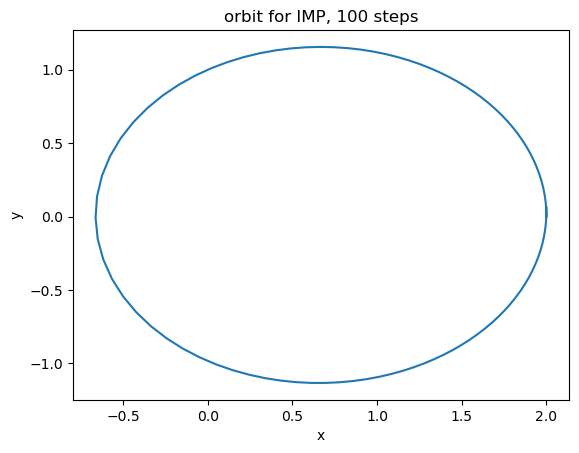

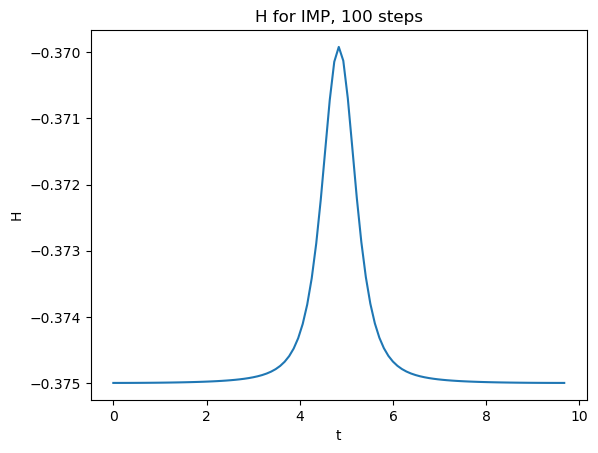

max - min = 0.005081464348190012


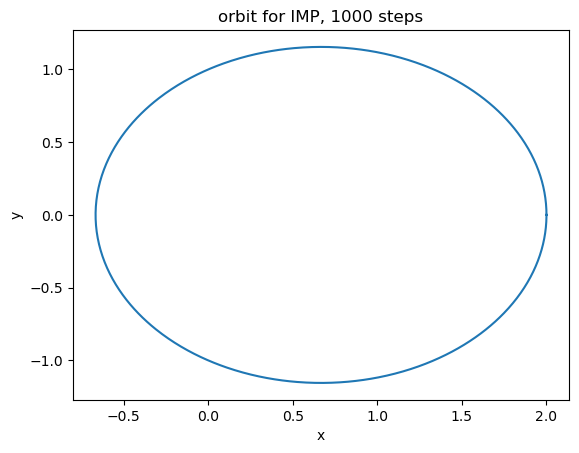

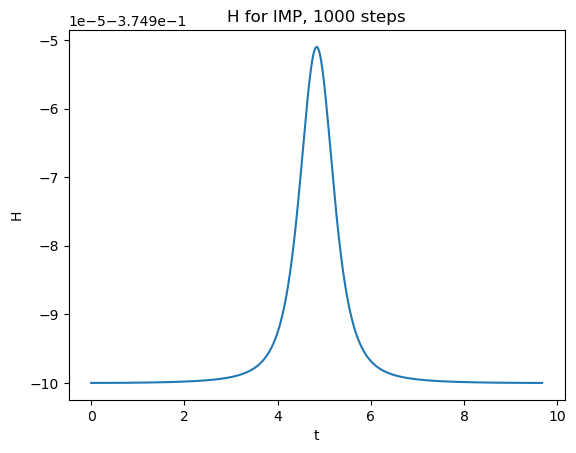

max - min = 4.900006001706814e-05


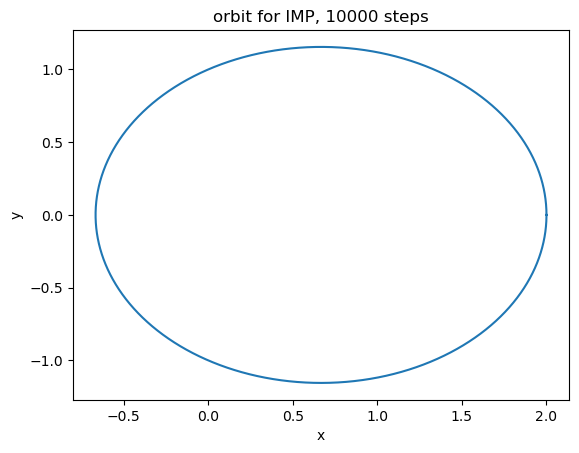

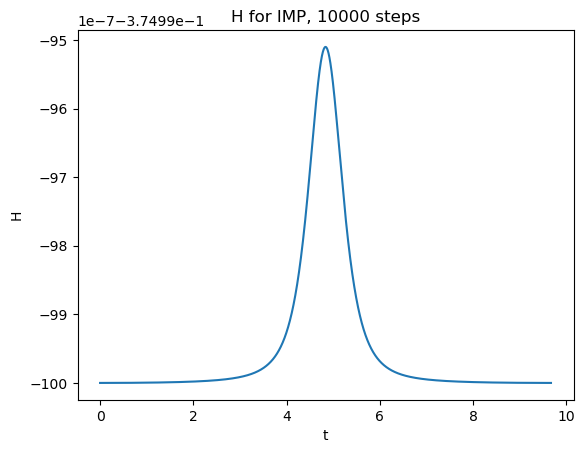

max - min = 4.898265737462992e-07


In [115]:
# run implicit midpoint rule for 3 values of Nsteps
for Nsteps in [100, 1000, 10000]:
    
    h = Tmax/Nsteps
    sol = np.zeros((Nsteps+1, 4))
    sol[0,:] = y0
    for j in range(Nsteps):
        sol[j+1,:] = IMPstep(sol[j,:], h)
        
    plt.rcParams.update({'font.size': 10})
    plt.plot(sol[:,2], sol[:,3])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("orbit for IMP, {} steps".format(Nsteps))
    plt.savefig("IMP orbit {} steps.png".format(Nsteps))
    plt.show()
    
    t = np.arange(0, Tmax+h, h)
    ham = [H(y) for y in sol]
    plt.plot(t, ham)
    plt.xlabel("t")
    plt.ylabel("H")
    plt.title("H for IMP, {} steps".format(Nsteps))
    plt.savefig("IMP ham {} steps.png".format(Nsteps))
    plt.show()
    print("max - min =", max(ham)-min(ham))

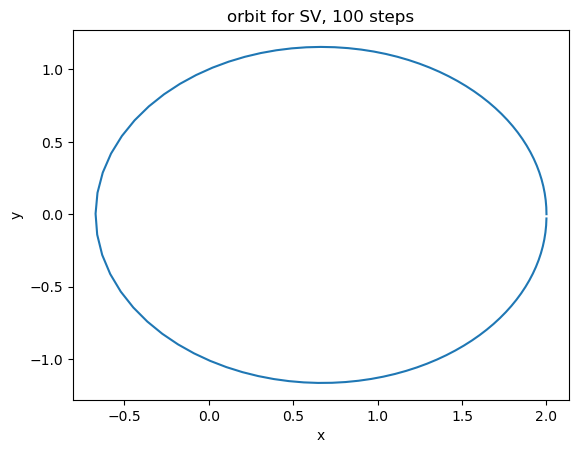

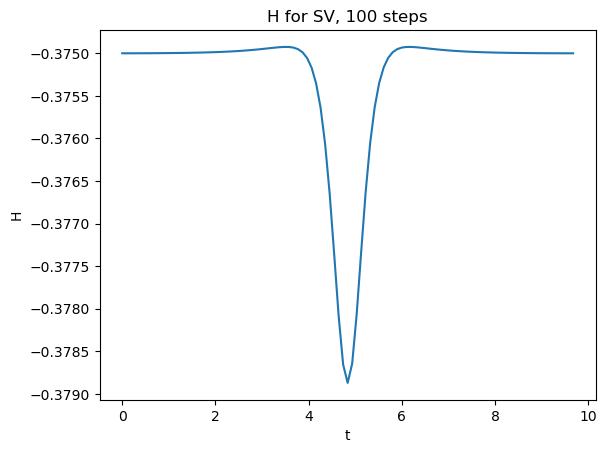

max - min = 0.0039456711144399415


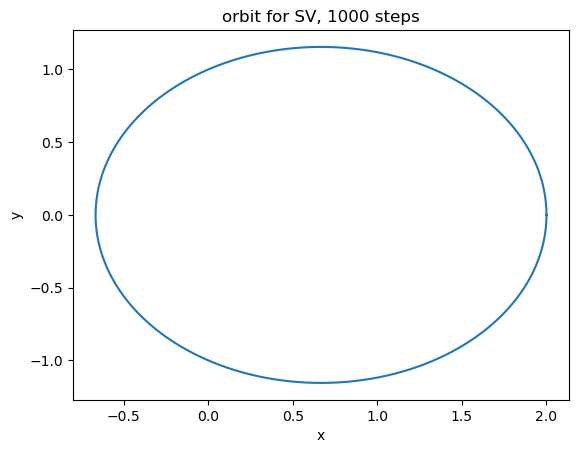

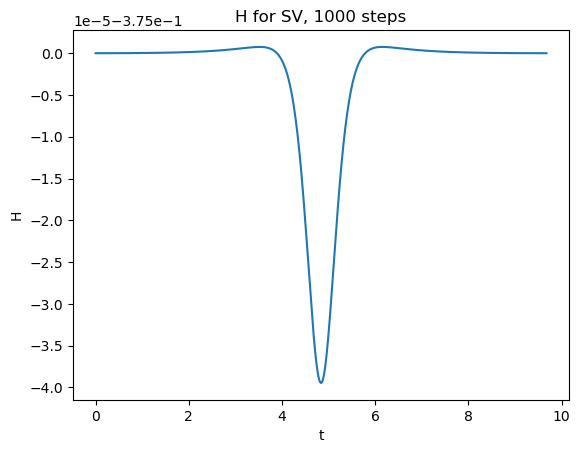

max - min = 4.022530826314208e-05


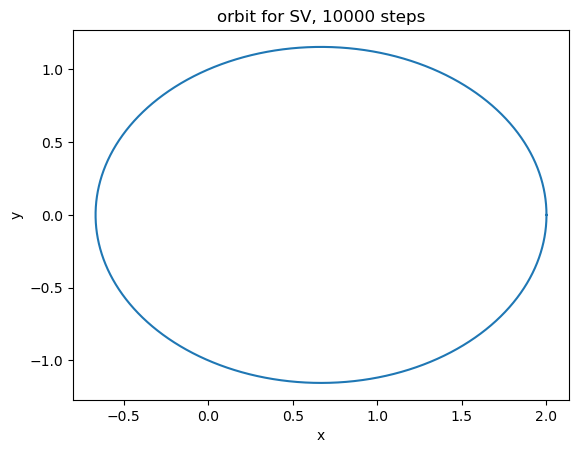

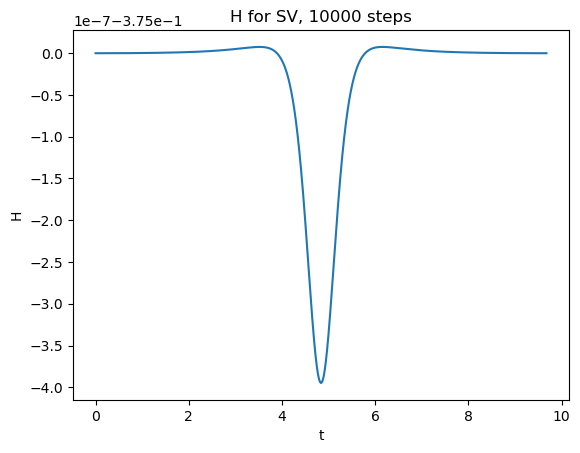

max - min = 4.0233147502455324e-07


In [116]:
# run Stoermer-Verlet method for 3 values of Nsteps
for Nsteps in [100, 1000, 10000]:
    
    h = Tmax/Nsteps
    sol = np.zeros((Nsteps+1, 4))
    sol[0,:] = y0
    for j in range(Nsteps):
        sol[j+1,:] = SVstep(sol[j,:], h)
        
    plt.rcParams.update({'font.size': 10})
    plt.plot(sol[:,2], sol[:,3])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("orbit for SV, {} steps".format(Nsteps))
    plt.savefig("SV orbit {} steps.png".format(Nsteps))
    plt.show()
    
    t = np.arange(0, Tmax+h, h)
    ham = [H(y) for y in sol]
    plt.plot(t, ham)
    plt.xlabel("t")
    plt.ylabel("H")
    plt.title("H for SV, {} steps".format(Nsteps))
    plt.savefig("SV ham {} steps.png".format(Nsteps))
    plt.show()
    print("max - min =", max(ham)-min(ham))

In [65]:
a=[H(y) for y in sol_IMP]
print(max(a))
print(min(a))

-0.3749995101734309
-0.37500000000000466


In [61]:
a=np.zeros((2, 4))
a[0,:]=[1,2,3,4]
a[1,:]=[5,6,7,8]
print(a)
print(H(a))

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


IndexError: index 2 is out of bounds for axis 0 with size 2

In [88]:
a=np.array([1,2,3,4])
b=np.array([4,3,2,1,0])
print(np.append(a,b))

[1 2 3 4 4 3 2 1 0]
